In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hpelm
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [6]:
df = pd.read_csv('path_to_save_combined_data.csv')
df.head()

,Unnamed: 0,state_name_full,Year,PM2.5,Life Expectancy,Income
0,0,Andhra Pradesh,2004,25.202646,64.6,32057
1,1,Andhra Pradesh,2005,27.262032,65.0,38328
2,2,Andhra Pradesh,2006,27.960725,65.3,28223
3,3,Andhra Pradesh,2007,29.120783,65.5,50870
4,4,Andhra Pradesh,2008,30.682722,65.7,57141


In [7]:
national_averages = df.groupby('Year').agg({
    'PM2.5': 'mean',
    'Life Expectancy': 'mean',
    'Income': 'mean'
}).reset_index()

national_averages

,Year,PM2.5,Life Expectancy,Income
0,2004,41.961308,65.092857,32767.428571
1,2005,41.536587,65.464286,38957.071429
2,2006,43.130745,65.850000,27910.785714
3,2007,44.233978,66.157143,51336.285714
4,2008,46.996889,66.442857,57525.857143
5,2009,46.710101,66.678571,63715.571429
6,2010,46.737420,66.978571,69905.142857
7,2011,49.402613,67.392857,57123.714286
8,2012,48.132919,67.878571,70396.928571
9,2013,47.590035,68.378571,79227.714286


In [8]:
national_averages.to_csv('aggregated.csv')

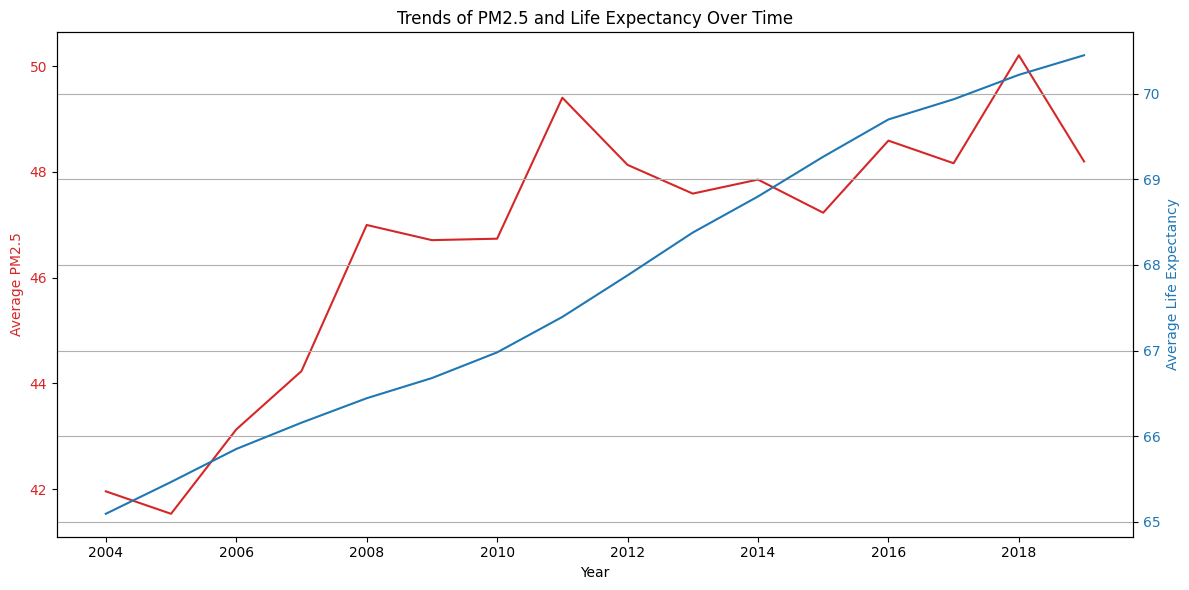

In [10]:
# Setting up the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting PM2.5 on the first axis
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average PM2.5', color=color)
ax1.plot(national_averages['Year'], national_averages['PM2.5'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second axis for Life Expectancy
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Average Life Expectancy', color=color)
ax2.plot(national_averages['Year'], national_averages['Life Expectancy'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Adding a title and grid
plt.title('Trends of PM2.5 and Life Expectancy Over Time')
fig.tight_layout()
plt.grid(True)
plt.show()


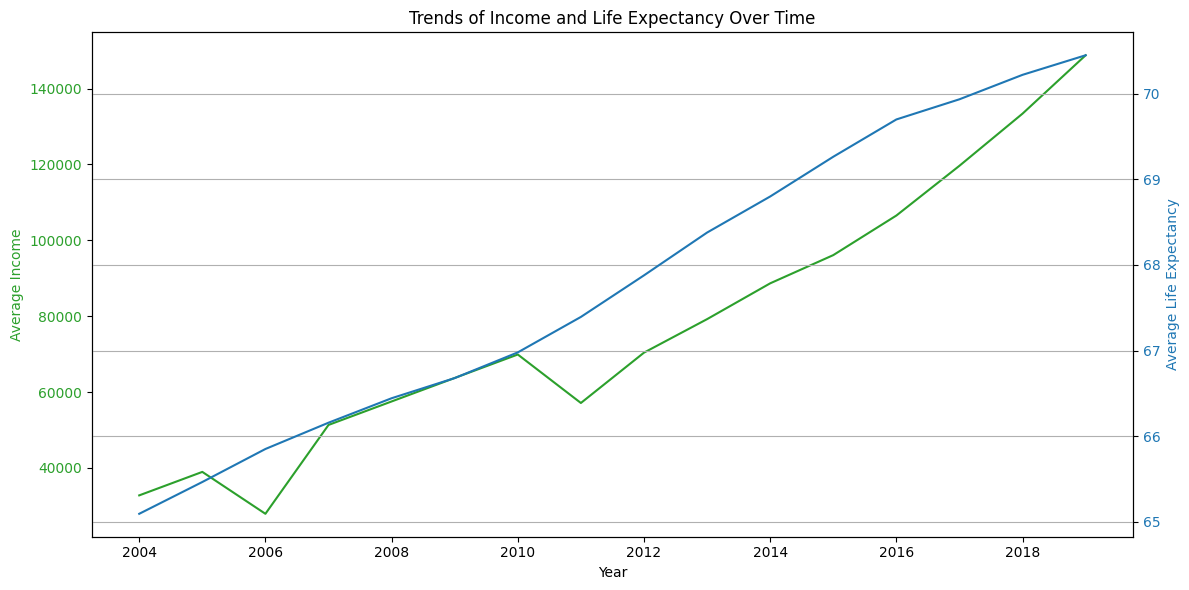

In [11]:
# Setting up the figure and axis for Life Expectancy and Income
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Income on the first axis
color = 'tab:green'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Income', color=color)
ax1.plot(national_averages['Year'], national_averages['Income'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second axis for Life Expectancy
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Average Life Expectancy', color=color)
ax2.plot(national_averages['Year'], national_averages['Life Expectancy'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Adding a title and grid
plt.title('Trends of Income and Life Expectancy Over Time')
fig.tight_layout()
plt.grid(True)
plt.show()


In [187]:
X = national_averages.drop('Life Expectancy', axis=1)
y = national_averages['Life Expectancy']

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
X = national_averages.drop('Life Expectancy', axis=1)
y = national_averages['Life Expectancy'].values.reshape(-1, 1)
X = pd.get_dummies(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
elm = hpelm.ELM(X_train.shape[1], 1)
elm.add_neurons(80, 'sigm')

In [15]:
elm.train(X_train, y_train, 'r')

In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred = elm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 120.7714986942882


In [17]:
mse = mean_absolute_error(y_test, y_pred)
mse

9.363650211456331

In [42]:
r2 = r2_score(y_test, y_pred)
r2

0.8198480836864368

# Random Forest

In [25]:
rf = RandomForestRegressor()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train

,Year,PM2.5,Income
13,2017,48.163542,119664.571429
11,2015,47.228528,96107.285714
8,2012,48.132919,70396.928571
9,2013,47.590035,79227.714286
2,2006,43.130745,27910.785714
15,2019,48.197651,148795.571429
4,2008,46.996889,57525.857143
7,2011,49.402613,57123.714286
10,2014,47.855036,88667.428571
12,2016,48.591192,106541.142857


In [29]:
rf.fit(X_train,y_train)

c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [30]:
national_averages

,Year,PM2.5,Life Expectancy,Income
0,2004,37.765178,65.092857,39320.914286
1,2005,37.382928,65.464286,46748.485714
2,2006,38.817671,65.850000,33492.942857
3,2007,39.810580,66.157143,61603.542857
4,2008,42.297200,66.442857,69031.028571
5,2009,42.039091,66.678571,76458.685714
6,2010,42.063678,66.978571,83886.171429
7,2011,44.462352,67.392857,68548.457143
8,2012,43.319627,67.878571,84476.314286
9,2013,42.831032,68.378571,95073.257143


In [31]:
df1 = national_averages[['Year', 'PM2.5', 'Income']]
predictions_india = rf.predict(national_averages[['Year', 'PM2.5', 'Income']])

In [32]:
national_averages['Predicted Life Expectancy with 10 % PM2.5 Decrease and 10% income increase'] = predictions_india

In [33]:
national_averages.head()

,Year,PM2.5,Life Expectancy,Income,Predicted Life Expectancy with 10 % PM2.5 Decrease and 10% income increase
0,2004,37.765178,65.092857,39320.914286,66.024786
1,2005,37.382928,65.464286,46748.485714,66.149571
2,2006,38.817671,65.850000,33492.942857,66.024786
3,2007,39.810580,66.157143,61603.542857,66.367214
4,2008,42.297200,66.442857,69031.028571,66.564500


In [19]:
df.to_csv('yearly.csv')

In [34]:
national_averages['Income'] *= 1.20

In [35]:
national_averages['PM2.5'] *= 0.90

In [36]:
df_max = df.groupby('Year').agg({'Life Expectancy': 'first', 
                                                             'Predicted Life Expectancy with 10% Income Increase': 'max'}).reset_index()

KeyError: "Column(s) ['Predicted Life Expectancy with 10% Income Increase'] do not exist"

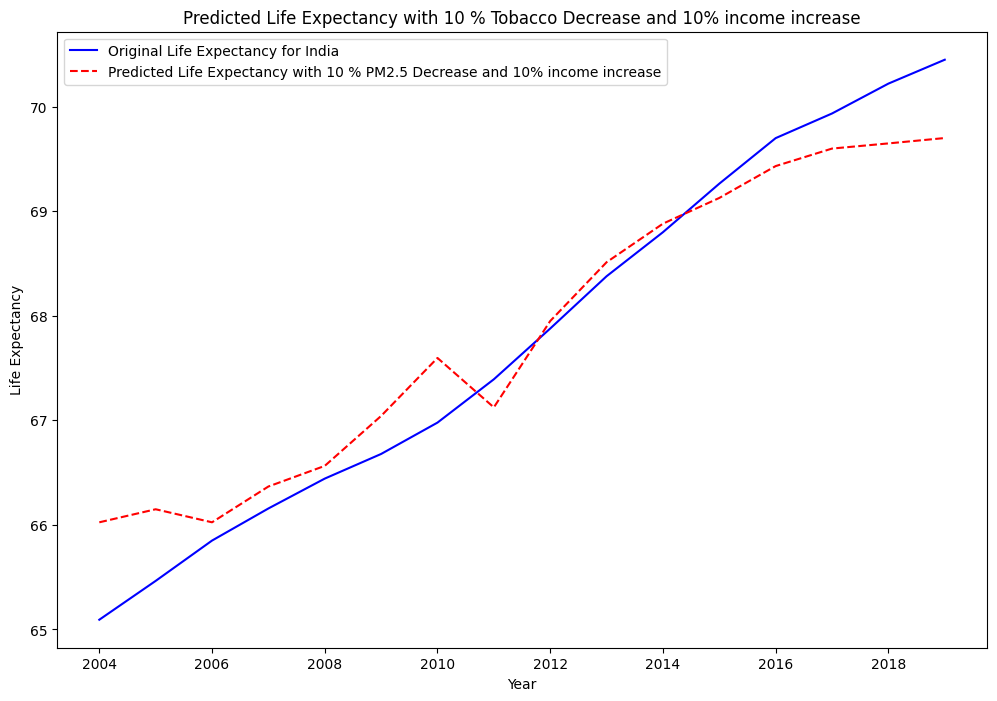

In [37]:
plt.figure(figsize=(12, 8))
plt.plot(national_averages['Year'], national_averages['Life Expectancy'], label='Original Life Expectancy for India', color='blue')
plt.plot(national_averages['Year'], national_averages['Predicted Life Expectancy with 10 % PM2.5 Decrease and 10% income increase'], label='Predicted Life Expectancy with 10 % PM2.5 Decrease and 10% income increase', color='red', linestyle='--')
plt.title('Predicted Life Expectancy with 10 % Tobacco Decrease and 10% income increase')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()


In [38]:
national_averages['Diff'] = national_averages['Predicted Life Expectancy with 10 % PM2.5 Decrease and 10% income increase'] - national_averages['Life Expectancy']

In [39]:
diff_summary = national_averages['Diff'].describe()
print(diff_summary)

count    16.000000
mean      0.066487
std       0.452010
min      -0.749143
25%      -0.267732
50%       0.101607
75%       0.248482
max       0.931929
Name: Diff, dtype: float64
